# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('dark_background')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [2]:
def generate_data(n_points=20):
    """
      Принимает на вход n_points точек
      Возвращает данные для обучения и теста
    """
    X = np.linspace(-5, 5, n_points)
    y = 10 * X - 7

    X_train = X[0::2].reshape(-1, 1)
    y_train = y[0::2] + np.random.randn(int(n_points / 2)) * 10

    X_test = X[1::2].reshape(-1, 1)
    y_test = y[1::2] + np.random.randn(int(n_points / 2)) * 10

    print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
    return X, X_train, y_train, X_test, y_test

In [3]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [4]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

# noinspection PyPep8Naming
def find_weights(
    X: np.ndarray,
    y: np.ndarray,
) -> np.ndarray:
    # adding bias
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    return np.linalg.inv(X.T @ X) @ X.T @ y


def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


In [5]:
b, *w = find_weights(X_train, y_train)
print(f'w = {w}, b = {b}')
print(f'MSE = {mse(y_test, w * X_test + b)}')
print(f'MAE = {mae(y_test, w * X_test + b)}')

w = [9.391713222450772], b = -7.001894467545902
MSE = 1692.123790883746
MAE = 33.51033008721178


In [6]:
# noinspection PyPep8Naming
def make_plot(X, y, w, b):
    plt.scatter(X, y, label='data', color='blue', s=5, alpha=0.5)
    plt.plot(X, w * X + b, label='prediction')
    plt.legend()
    plt.show()

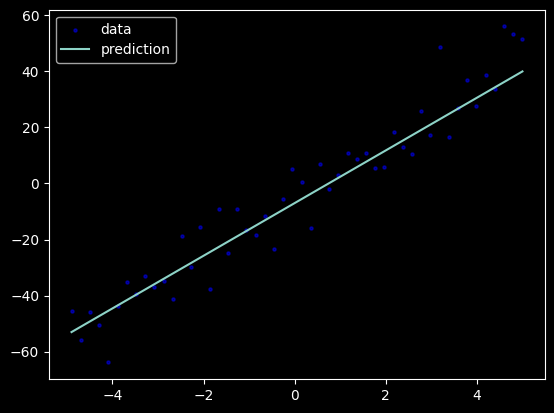

In [7]:
make_plot(X_test, y_test, w, b)

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [8]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data = {'support': np.linspace(0, 2 * np.pi, num=n_support)}
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data


data = generate_wave_set(1000, 250)

In [9]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

b, *w = find_weights(data['x_train'].reshape(-1, 1), data['y_train'])
print(f'w = {w}, b = {b}')
print(f'MSE = {mse(data["values"], w * data["support"] + b)}')
print(f'MAE = {mae(data["values"], w * data["support"] + b)}')

w = [-0.2901984174777496], b = 1.940633216509244
MSE = 0.19813477250671416
MAE = 0.3943208827934963


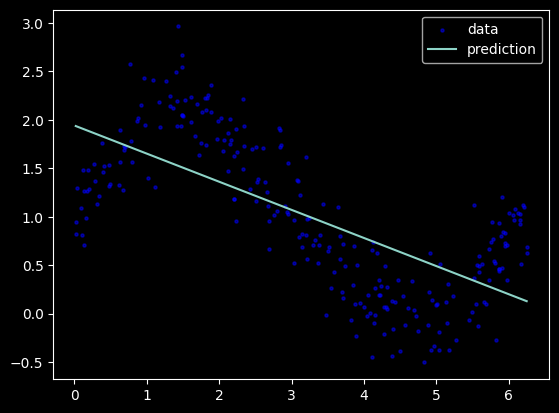

In [10]:
make_plot(data['x_train'], data['y_train'], w, b)

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$

## Задание 3.3

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней.
### Полином какой степени подходит больше других? Почему?

def poly_regression(x, y, degree=1):
    poly = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression(fit_intercept=False))
    ])
    poly.fit(x.reshape(-1, 1), y)
    return poly


def make_plot_poly(x, y, poly, degree):
    plt.figure(dpi=70)
    plt.scatter(x, y, label='train data', color='blue', s=5, alpha=0.5)
    plt.plot(x, poly.predict(x.reshape(-1, 1)), label='poly regression')
    MSE = mse(y, poly.predict(x.reshape(-1, 1)))
    MAE = mae(y, poly.predict(x.reshape(-1, 1)))
    CV = cross_val_score(poly, x.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error').mean()
    plt.title(f'Polynomial regression, degree = {degree}, MSE = {MSE:.5f}, MAE = {MAE:.5f}, CV = {CV:.5f}')
    plt.legend()
    plt.show()
    return CV

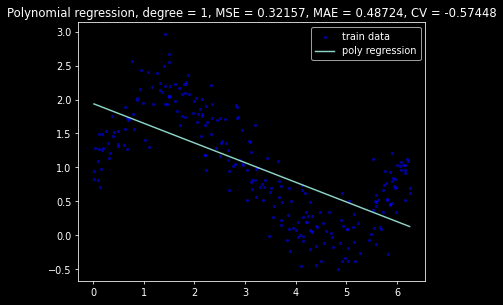

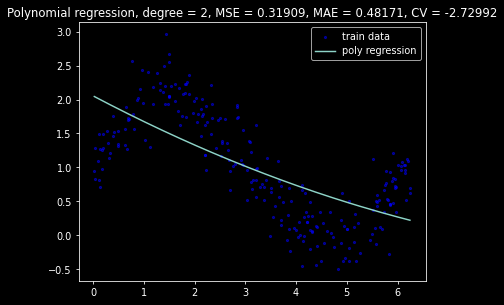

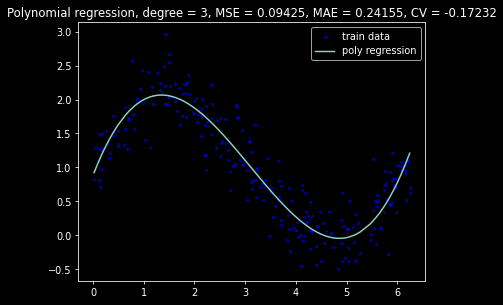

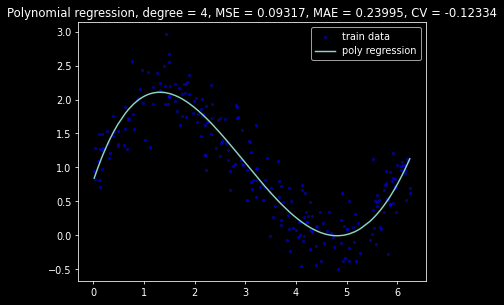

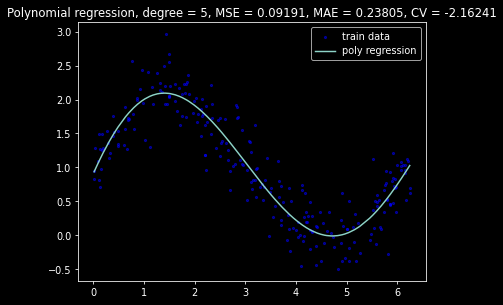

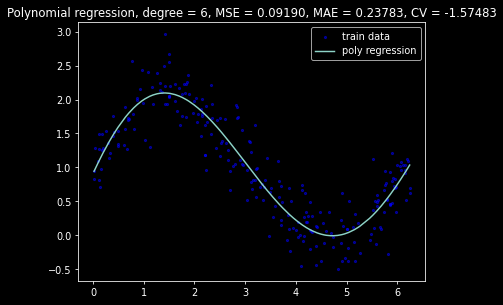

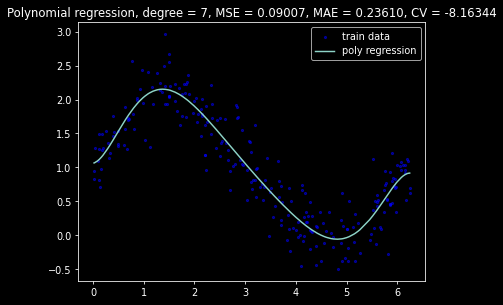

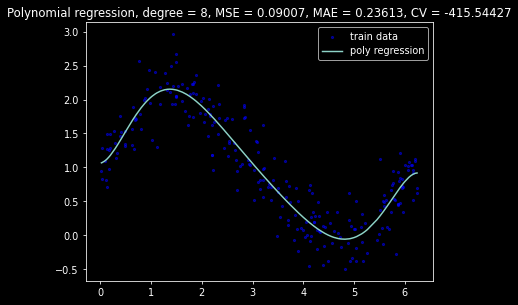

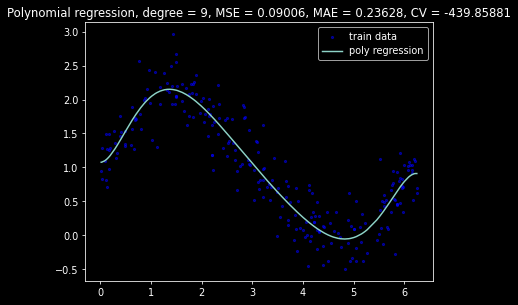

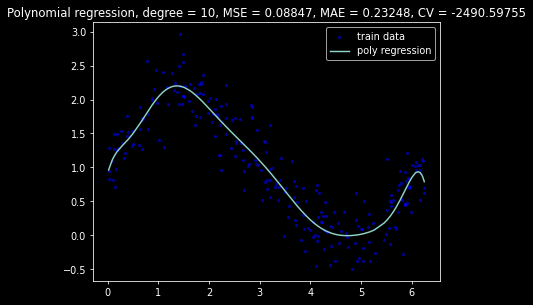

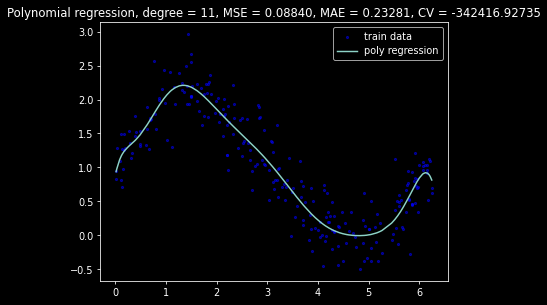

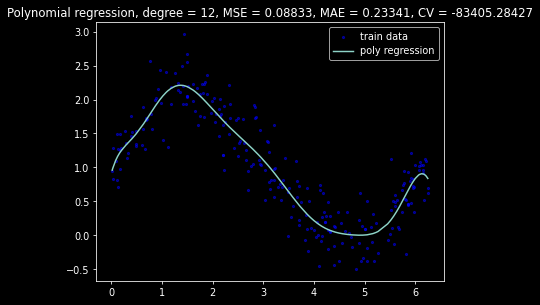

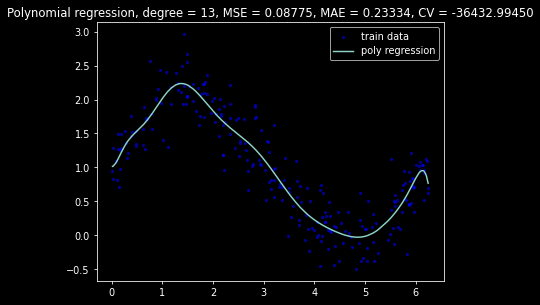

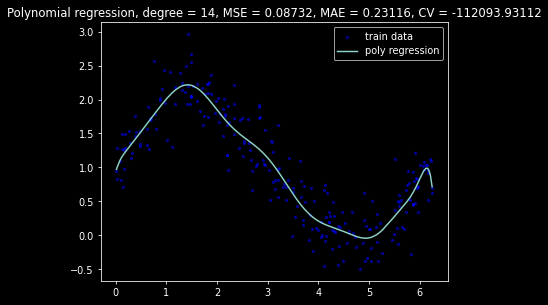

In [12]:
# create mass of polynomials
polys = [
    poly_regression(data['x_train'], data['y_train'], degree)
    for degree in range(1, 15)
]

# plot them
cv = [
    (degree, make_plot_poly(data['x_train'], data['y_train'], poly, degree))
    for degree, poly in enumerate(polys, start=1)
]

In [13]:
# finding the best polynomial degree by CV
best_degree, best_cv = max(cv, key=lambda x: x[1])
print(f'Best degree = {best_degree}, CV = {best_cv}')

Best degree = 4, CV = -0.12333870940196281


# Вывод

Попробовав различные степени для полиномиальной регрессии, можно сделать вывод, что наилучший результат показывает полином 3-5 степени.

Глядя на MSE и MAE, можно сделать вывод, что при маленьких полиномах (1-2 степени) модель недообучается, а при больших (6-7 степени) - переобучается.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [14]:
from sklearn.datasets import load_boston

In [15]:
import warnings

warnings.filterwarnings('ignore')
house_data = load_boston()

## Задание 3.4

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

house_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [17]:
print(house_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [18]:
# noinspection PyRedeclaration
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = pd.DataFrame(house_data['target'], columns=['price'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f'MSE train: {mean_squared_error(y_train, y_train_pred):.3f}, test: {mean_squared_error(y_test, y_test_pred):.3f}')
print(f'MAE train: {mean_absolute_error(y_train, y_train_pred):.3f}, test: {mean_absolute_error(y_test, y_test_pred):.3f}')

MSE train: 22.545, test: 21.517
MAE train: 3.357, test: 3.163


<BarContainer object of 13 artists>

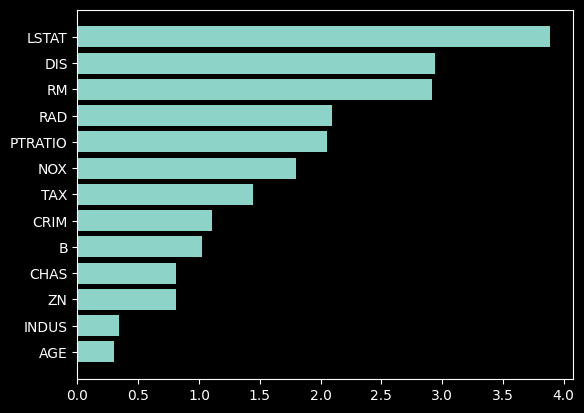

In [21]:
sorted_features = dict(sorted(zip(house_data['feature_names'], abs(model.coef_[0])), key=lambda x: abs(x[1])))
plt.barh(
    list(sorted_features.keys()),
    sorted_features.values()
)

In [22]:
top_features = list(sorted_features.keys())[-7:]

In [23]:
X_top = X[top_features]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

model = LinearRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [25]:
print(f'MSE train: {mean_squared_error(y_train, y_train_pred):.3f}, test: {mean_squared_error(y_test, y_test_pred):.3f}')
print(f'MAE train: {mean_absolute_error(y_train, y_train_pred):.3f}, test: {mean_absolute_error(y_test, y_test_pred):.3f}')

MSE train: 25.337, test: 21.545
MAE train: 3.603, test: 3.217


# Вывод

Из-за того, что мы оставили только 7 лучших признаков, качество модели ухудшилось.
Это связано с тем, что мы убрали признаки, которые все-таки влияют на целевую переменную.

Однако, разница получилась не слишком большой, а число данных, потраченное на обучение модели, сократилось в 2 раза.
